# Dataset exploration

In [1]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Traffic data

https://www.opendata.dk/vejdirektoratet/stojdata-mastra

http://noegletal.dk/noegletal/

| Variable name | Description |
|---------------------|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| DATAEJER | The owner of the traffic key figures - is displayed as the municipality number. The Road Directorate stands as data owner 0. |
| VEJBESTYRER | The road manager at the counting point - appears as a municipality number. The Road Directorate stands as road manager 0. |
| VEJNR | The administrative road number as stated in CVF (The Central Road and Path List, see cvf.dk) |
| VEJDEL | The road section of the counting point, in some municipalities also referred to as the Side Road Number. Is generally '0', or starts with '0', for regular road. |
| VEJNAVN | The name of the road at the counting point. |
| KILOMETER | The mileage indication - the counting point has a so-called mileage (stationing), which is typically the distance from the start of the road to the counting point; The mileage is then the mileage part of the mileage. |
| METER | As above, it is just a meter part of the mileage. |
| LOKATION | Description of the counting location |
| KOMMUNE | The municipality number at the counting point |
| KOERETOEJSART | Vehicle type, either Motor Vehicles (MOTORCTJ) or Bicycle moped (C / K) |
| AAR | The year in which the count, or counts, were performed. |
| AADT | Listed figures for annual traffic. Average number of vehicles per 24hour, taken over all days of the year. |
| HDT | Listed figures for Everyday Day traffic. Average number of vehicles per 24hour taken over all weekdays of the year. Weekends, summer vacation period and holidays are not included |
| JDT | Enumerated figures for July-Day traffic - traffic on a day in July |
| TRAFIKTYPE | The type of traffic, which says something about the distribution of traffic over the year. |
| GNS_HASTIGHED | The average measured speed of the counting point. |
| TALTE_DAGE | Number of days counted within the year. |
| AE10HOEJ | Equivalent 10-ton axes, usually referred to as Æ10 - a measure of the load of the road's bearing layer, calculated here for roads outside a designated urban area |
| AE10LAV | Like AE10HOEJ, but in a decidedly urban area. |
| LBIL_AADT | Truck EIGHT - EIGHT for trucks, here defined as vehicles with a total length of more than 5.80 meters. |
| HAST_GRAENSE | The speed limit applicable at the counting point. |
| FRAKTIL_PCT_15 | ! 5% speed quantile - the speed at which 15% of vehicles drive. |
| FRAKTIL_PCT_85 | 85% speed quantile - the speed at which 85% of vehicles drive. |
| PCT_OVER_HASTGR | Percentage of vehicles traveling above the speed limit, ie "too fast". |
| PCT_OVER_HASTGR_P10 | Percentage of vehicles traveling above the speed limit + 10km / h - if the speed limit is 60km/h, that is the percentage of vehicles that drive above 70km/h. |
| PCT_OVER_HASTGR_P20 | Percentage of vehicles traveling above the speed limit + 20km / h - if the speed limit is 60km/h, that is the percentage of vehicles that drive above 80km/h. |
| LBIL_PCT | The percentage of trucks taken in relation to the total amount of motor vehicles. Trucks here are vehicles with a total length of more than 5.80 meters. |

In [2]:
traffic_data = pd.read_csv("dataset/NOEGLETAL_trafficdata.csv", encoding="ISO-8859-1")
traffic_data.head()

,FID,DATAEJER,VEJBESTYRER,VEJNR,VEJDEL,VEJNAVN,KILOMETER,METER,LOKATION,KOMMUNE,...,AE10LAV,LBIL_AADT,HAST_GRAENSE,FRAKTIL_PCT_15,FRAKTIL_PCT_85,PCT_OVER_HASTGR,PCT_OVER_HASTGR_P10,PCT_OVER_HASTGR_P20,LBIL_PCT,KOOR_SDO
0,OPEN_DATA_NOEGLETAL_VIEW.fid--1778853a_17153ca...,751,751,7511252,0,Christian X´s Vej,0,540,Ml. Ellehammervej og Marconivej,751,...,NaN,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,POINT (573014.0000013472 6221529.999744055)
1,OPEN_DATA_NOEGLETAL_VIEW.fid--1778853a_17153ca...,851,851,8515246,0,Marathonvej,0,180,Fabriksparken / Hobrovej,851,...,6.0,38.0,50.0,34.8,53.9,27.1,3.7,0.4,3.3,POINT (551965.0000006577 6315761.999742397)
2,OPEN_DATA_NOEGLETAL_VIEW.fid--1778853a_17153ca...,851,851,8516178,0,Offenbachsvej,0,222,Mozartsvej / Telemannsvænget,851,...,1.0,7.0,50.0,27.1,42.3,1.4,0.1,0.0,1.7,POINT (549415.0000006119 6318575.999742349)
3,OPEN_DATA_NOEGLETAL_VIEW.fid--1778853a_17153ca...,851,851,8512882,0,"Hadsundvej, Vejgård",0,183,Vejgård Møllevej / Tornstedsgade,851,...,155.0,510.0,50.0,22.0,38.6,1.0,0.1,0.0,5.7,POINT (557639.0000007852 6322595.999742275)
4,OPEN_DATA_NOEGLETAL_VIEW.fid--1778853a_17153ca...,316,316,3161633,0,"Søstrupvej, 4300 Holbæk",1,830,Søstrupvej ca. 170 m fra nr. 19,316,...,19.0,66.0,80.0,45.1,71.4,3.3,0.8,0.2,2.4,POINT (666785.000156862 6174846.999745046)


In [3]:
traffic_data.shape

(26917, 29)

In [4]:
#Check that he FID variable is unique for each observation
traffic_data.FID.unique().size

26917

In [5]:
traffic_data.dtypes

FID                     object
DATAEJER                 int64
VEJBESTYRER              int64
VEJNR                    int64
VEJDEL                  object
VEJNAVN                 object
KILOMETER                int64
METER                    int64
LOKATION                object
KOMMUNE                  int64
KOERETOEJSART           object
AAR                      int64
AADT                     int64
HDT                    float64
JDT                      int64
TRAFIKTYPE              object
GNS_HASTIGHED          float64
TALTE_DAGE             float64
AE10HOEJ               float64
AE10LAV                float64
LBIL_AADT              float64
HAST_GRAENSE           float64
FRAKTIL_PCT_15         float64
FRAKTIL_PCT_85         float64
PCT_OVER_HASTGR        float64
PCT_OVER_HASTGR_P10    float64
PCT_OVER_HASTGR_P20    float64
LBIL_PCT               float64
KOOR_SDO                object
dtype: object

In [6]:
traffic_data.describe()

,DATAEJER,VEJBESTYRER,VEJNR,KILOMETER,METER,KOMMUNE,AAR,AADT,HDT,JDT,...,AE10HOEJ,AE10LAV,LBIL_AADT,HAST_GRAENSE,FRAKTIL_PCT_15,FRAKTIL_PCT_85,PCT_OVER_HASTGR,PCT_OVER_HASTGR_P10,PCT_OVER_HASTGR_P20,LBIL_PCT
count,26917.000000,26917.000000,2.691700e+04,26917.000000,26917.000000,26917.000000,26917.000000,26917.000000,26891.000000,26917.000000,...,20164.000000,16601.000000,20164.000000,24499.000000,21421.000000,21421.000000,21227.000000,21227.000000,21227.000000,20150.000000
mean,431.650704,444.121893,3.862994e+06,13.206152,384.430546,534.130475,2016.673329,3910.158970,4321.332230,3735.884348,...,475.910732,66.084091,398.266564,64.574717,40.844148,60.525452,23.152570,7.321312,2.179884,7.778993
std,294.428343,288.242132,3.016431e+06,39.324667,290.244122,223.113566,2.934494,9557.766088,10495.270666,9511.382828,...,1898.955402,185.249207,1216.411545,22.911801,19.525077,23.707928,25.319288,12.004366,5.483642,5.958174
min,0.000000,0.000000,3.000000e+00,0.000000,0.000000,0.000000,2000.000000,-24.000000,-25.000000,-20.000000,...,-498.000000,0.000000,-1375.000000,5.000000,3.400000,9.400000,-1.300000,-7.700000,-17.200000,-27.200000
25%,161.000000,185.000000,6.005120e+05,0.000000,135.000000,320.000000,2015.000000,238.000000,258.000000,222.000000,...,14.000000,6.000000,27.000000,50.000000,25.900000,44.300000,0.800000,0.100000,0.000000,4.000000
50%,540.000000,550.000000,3.859390e+06,0.000000,325.000000,580.000000,2017.000000,1048.000000,1164.000000,948.000000,...,55.000000,20.000000,94.000000,50.000000,38.900000,56.900000,13.200000,2.000000,0.400000,6.800000
75%,710.000000,710.000000,6.571260e+06,6.000000,600.000000,740.000000,2019.000000,3674.000000,4104.000000,3329.000000,...,214.000000,64.000000,303.000000,80.000000,51.100000,74.800000,40.500000,9.600000,2.000000,10.100000
max,860.000000,860.000000,9.998743e+06,645.000000,8700.000000,990.000000,2020.000000,137802.000000,146930.000000,144349.000000,...,33839.000000,6750.000000,29273.000000,801.000000,116.300000,154.100000,100.000000,99.900000,93.400000,115.900000


#### Kommune variable
There should be max 98 Danish Municipalities. However, there are 102.

(http://www.maerkdinbygning.dk/materiale/files/materiale-konsulenter/energimarkning/1507-nyeoggamlekommunenumre.pdf)

In [7]:
#Check the KOMMUNE variable
traffic_data.KOMMUNE.unique().size

102

In [53]:
kommune_code = [101,147,151,153,155,157,159,161,163,165,167,169,173,175,183,185,187,190,201,210,217,219,223,230,240,250,253,259,260,265,269,270,306,316,320,326,329,330,336,340,350,360,370,376,390,400,410,420,430,440,450,461,479,480,482,492,510,530,540,550,561,563,573,575,580,607,615,621,630,657,661,665,671,706,707,710,727,730,740,741,746,751,756,760,766,773,779,787,791,810,813,820,825,840,846,849,851,860]
kommune_name = ["København","Frederiksberg","Ballerup","Brøndby","Dragør","Gentofte","Gladsaxe","Glostrup","Herlev","Albertslund","Hvidovre","Høje-Taastrup","Lyngby-Taarbæk","Rødovre","Ishøj","Tårnby","Vallensbæk","Furesø","Allerød","Fredensborg","Helsingør","Hillerød","Hørsholm","Rudersdal","Egedal","Frederikssund","Greve","Køge","Halsnæs","Roskilde","Solrød","Gribskov","Odsherred","Holbæk","Faxe","Kalundborg","Ringsted","Slagelse","Stevns","Sorø","Lejre","Lolland","Næstved","Guldborgsund","Vordingborg","Bornholm","Middelfart","Assens","Faaborg-Midtfyn","Kerteminde","Nyborg","Odense","Svendborg","Nordfyns","Langeland","Ærø","Haderslev","Billund","Sønderborg","Tønder","Esbjerg","Fanø","Varde","Vejen","Aabenraa","Fredericia","Horsens","Kolding","Vejle","Herning","Holstebro","Lemvig","Struer","Syddjurs","Norddjurs","Favrskov","Odder","Randers","Silkeborg","Samsø","Skanderborg","Aarhus","Ikast-Brande","Ringkøbing-Skjern","Hedensted","Morsø","Skive","Thisted","Viborg","Brønderslev","Frederikshavn","Vesthimmerlands","Læsø","Rebild","Mariagerfjord","Jammerbugt","Aalborg","Hjørring"]

kommune_dictionary = dict(zip(kommune_name, kommune_code))
inverse_dictionary = dict(zip(kommune_code, kommune_name))

In [46]:
#Remove observations with unexsting kommune code
traffic_data = traffic_data[traffic_data.KOMMUNE.isin(kommune_dictionary.values())]

In [41]:
traffic_data.KOMMUNE.unique().size

92

In [85]:
np.sort(traffic_data.KOMMUNE.unique())

array([101, 147, 151, 153, 157, 159, 161, 163, 165, 167, 169, 173, 175,
       183, 185, 187, 190, 201, 210, 217, 219, 230, 240, 250, 253, 259,
       260, 265, 269, 270, 306, 316, 320, 326, 329, 330, 336, 340, 350,
       360, 370, 376, 390, 400, 410, 420, 430, 440, 450, 461, 479, 480,
       482, 510, 530, 540, 550, 561, 573, 575, 580, 607, 615, 621, 630,
       657, 661, 665, 671, 706, 707, 710, 727, 730, 740, 746, 751, 756,
       760, 766, 773, 779, 787, 791, 810, 813, 820, 840, 846, 849, 851,
       860], dtype=int64)

In [65]:
traffic_data['KOMMUNENAME'] = traffic_data.KOMMUNE.map(inverse_dictionary)

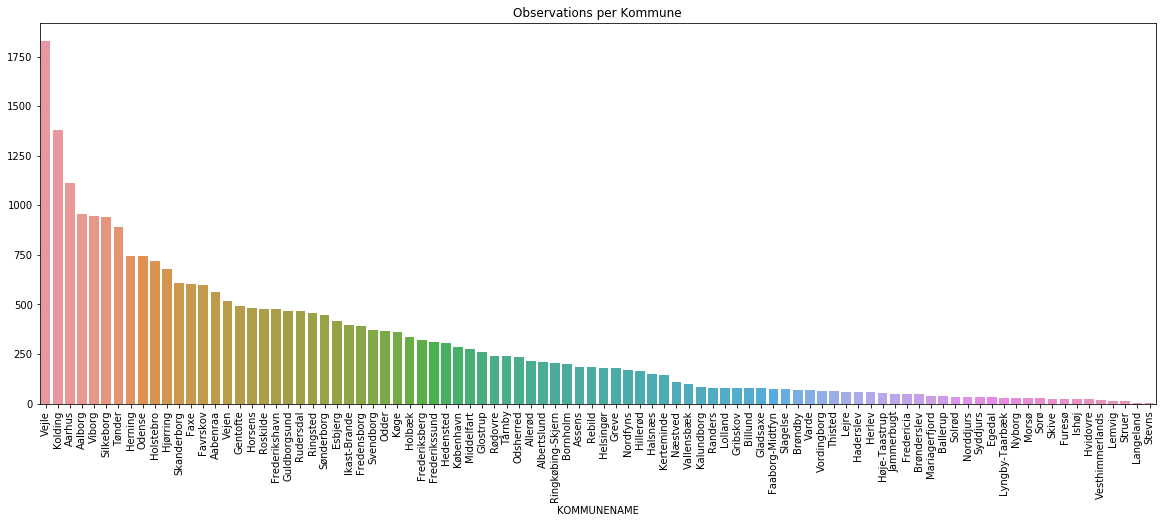

In [71]:
plt.figure(figsize=(20,7))
plt.title("Observations per Kommune")
df = traffic_data.groupby('KOMMUNENAME').FID.count().sort_values(ascending = False)
ax = sns.barplot(df.keys(), df.values, order=df.keys())
plt.setp(ax.get_xticklabels(), rotation=90);

#### AAR variable

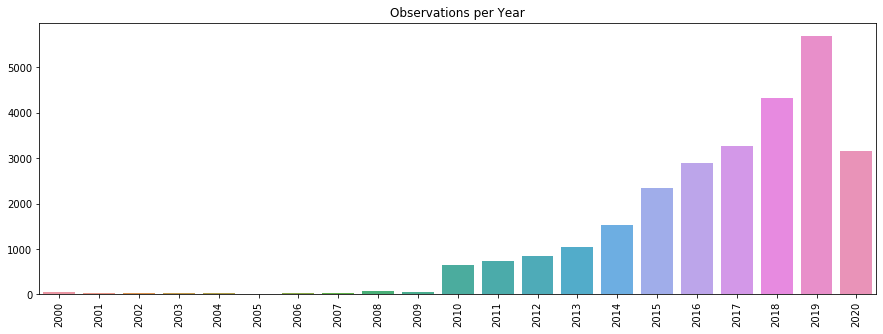

In [12]:
plt.figure(figsize=(15,5))
plt.title("Observations per Year")
df = traffic_data.AAR.value_counts()
ax = sns.barplot(df.keys(), df.values, order=df.keys().sort_values())
plt.setp(ax.get_xticklabels(), rotation=90);

#### Number of cars in 24h (AADT, HDT, JDT)

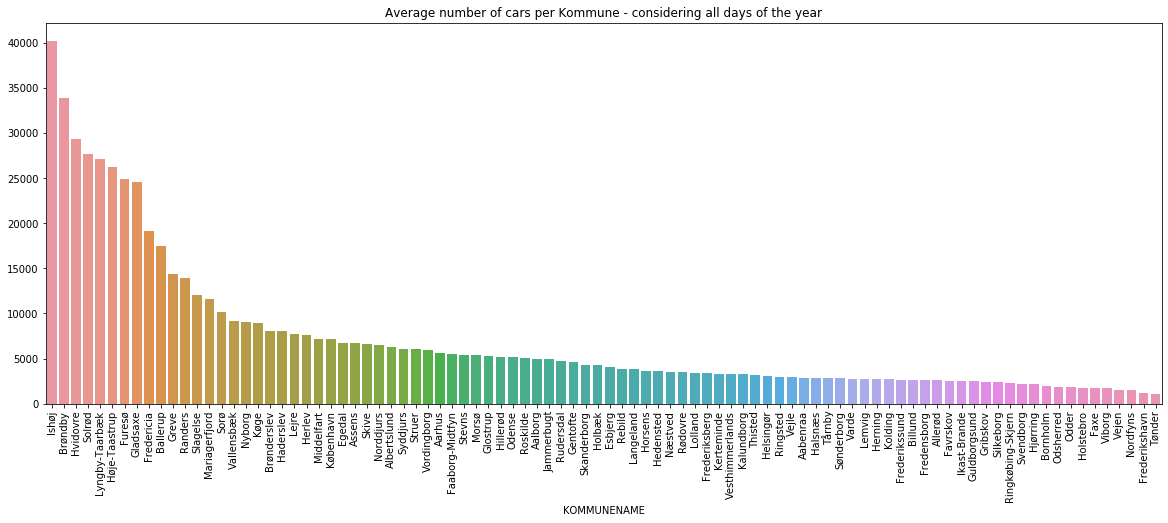

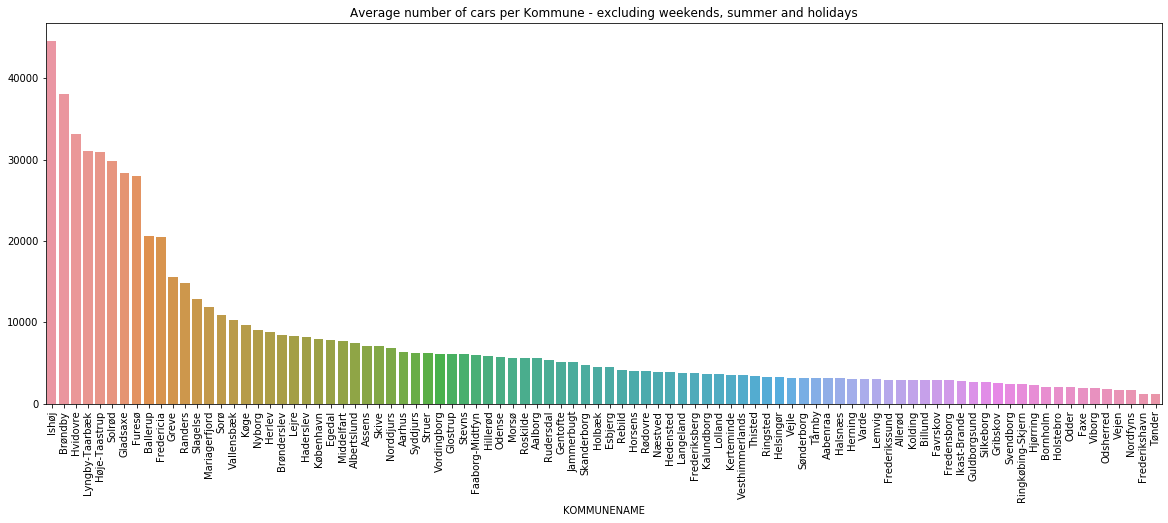

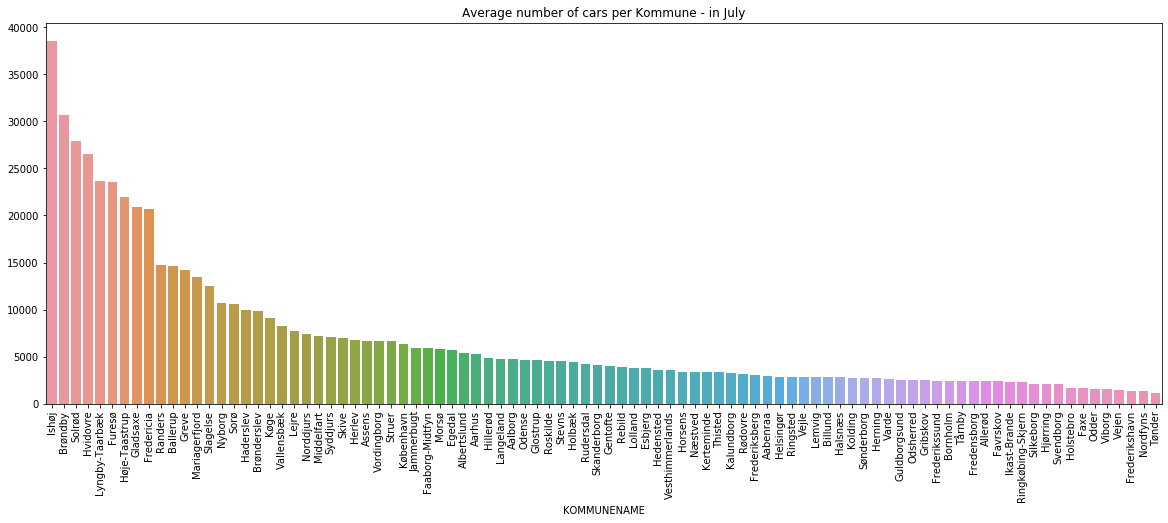

In [72]:
#Considering all days of the year
plt.figure(figsize=(20,7))
plt.title("Average number of cars per Kommune - considering all days of the year")
df = traffic_data.groupby('KOMMUNENAME').AADT.mean().sort_values(ascending = False)
ax = sns.barplot(df.keys(), df.values, order = df.keys())
plt.setp(ax.get_xticklabels(), rotation=90);

#Excluding weekends, summer and holidays
plt.figure(figsize=(20,7))
plt.title("Average number of cars per Kommune - excluding weekends, summer and holidays")
df = traffic_data.groupby('KOMMUNENAME').HDT.mean().sort_values(ascending = False)
ax = sns.barplot(df.keys(), df.values, order = df.keys())
plt.setp(ax.get_xticklabels(), rotation=90);

#Considering only July
plt.figure(figsize=(20,7))
plt.title("Average number of cars per Kommune - in July")
df = traffic_data.groupby('KOMMUNENAME').JDT.mean().sort_values(ascending = False)
ax = sns.barplot(df.keys(), df.values, order = df.keys())
plt.setp(ax.get_xticklabels(), rotation=90);

#### Comparing the number of cars in July vs a working day
Some kommunes (values <1, on the left) experience a drop in traffic in July (business areas?), some (values >1, on the right) experience an increase in traffic in July (holiday destinations?).

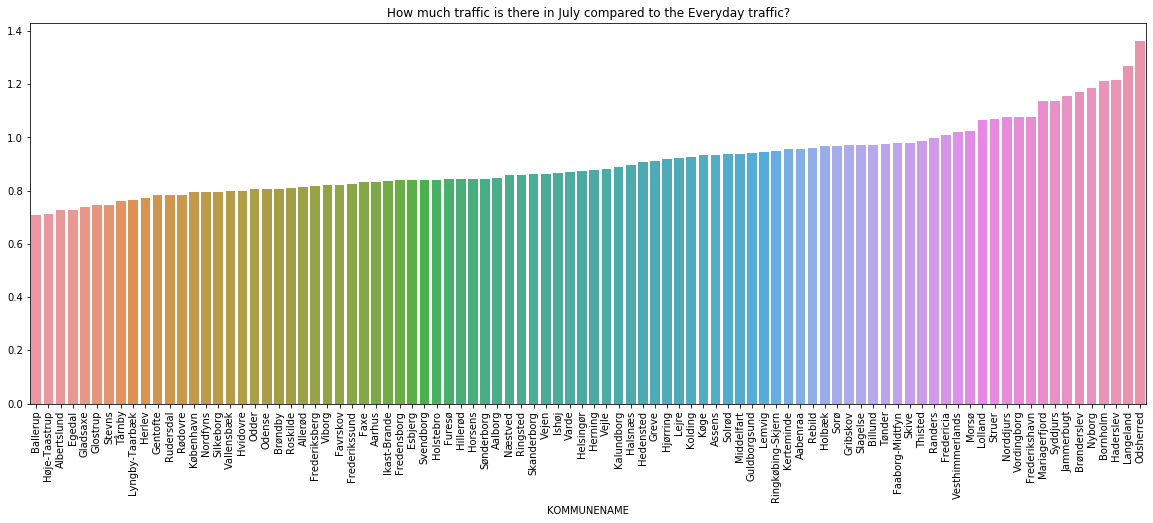

In [74]:
plt.figure(figsize=(20,7))
plt.title("How much traffic is there in July compared to the Everyday traffic?")
df = (traffic_data.groupby('KOMMUNENAME').JDT.mean() / traffic_data.groupby('KOMMUNENAME').HDT.mean()).sort_values()
ax = sns.barplot(df.keys(), df.values)
plt.setp(ax.get_xticklabels(), rotation=90);

#### Traffic types 

I am not sure what BO-ARB means. "Bo og arbejde" = Live and work?

How is that different than BY (city?)


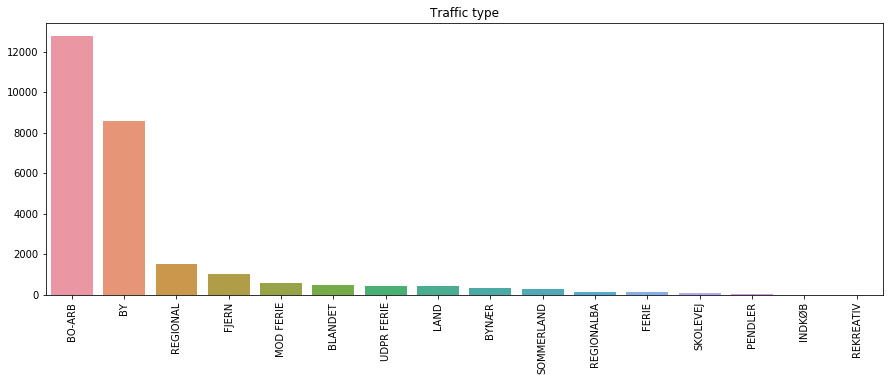

In [30]:
plt.figure(figsize=(15,5))
plt.title("Traffic types")
df = traffic_data.TRAFIKTYPE.value_counts()
ax = sns.barplot(df.keys(), df.values)
plt.setp(ax.get_xticklabels(), rotation=90);

#### Speed

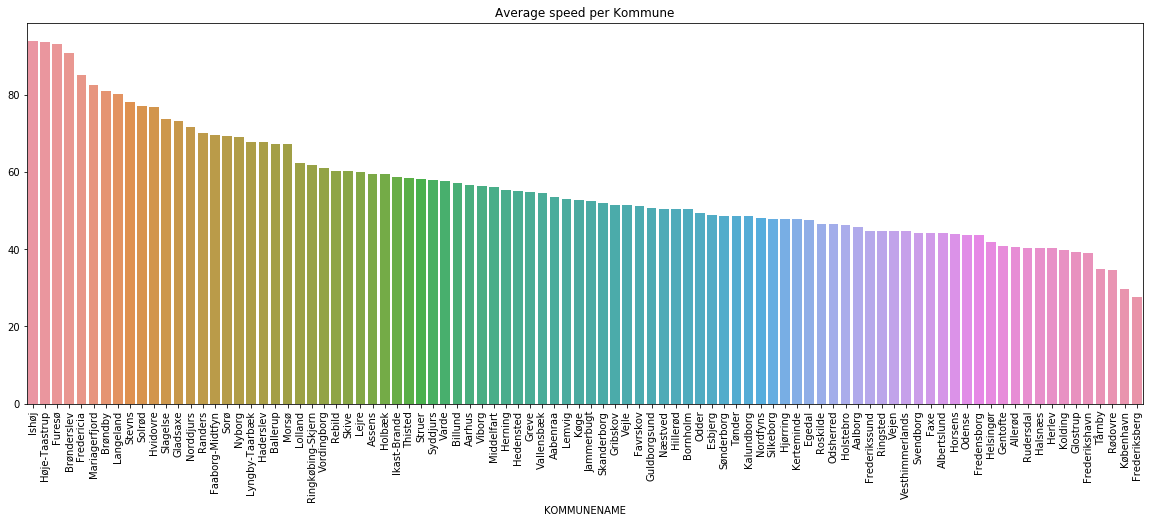

In [75]:
plt.figure(figsize=(20,7))
plt.title("Average speed per Kommune")
df = traffic_data.groupby('KOMMUNENAME').GNS_HASTIGHED.mean().sort_values(ascending = False)
ax = sns.barplot(df.keys(), df.values, order = df.keys())
plt.setp(ax.get_xticklabels(), rotation=90);

#### Trucks

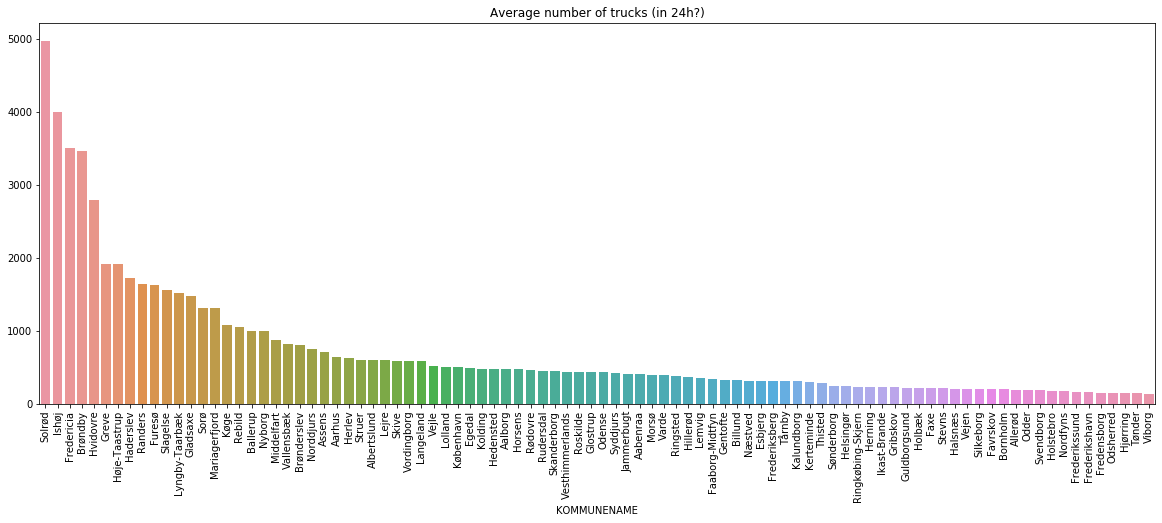

In [79]:
plt.figure(figsize=(20,7))
plt.title("Average number of trucks (in 24h?)")
df = traffic_data.groupby('KOMMUNENAME').LBIL_AADT.mean().sort_values(ascending = False)
ax = sns.barplot(df.keys(), df.values, order = df.keys())
plt.setp(ax.get_xticklabels(), rotation=90);

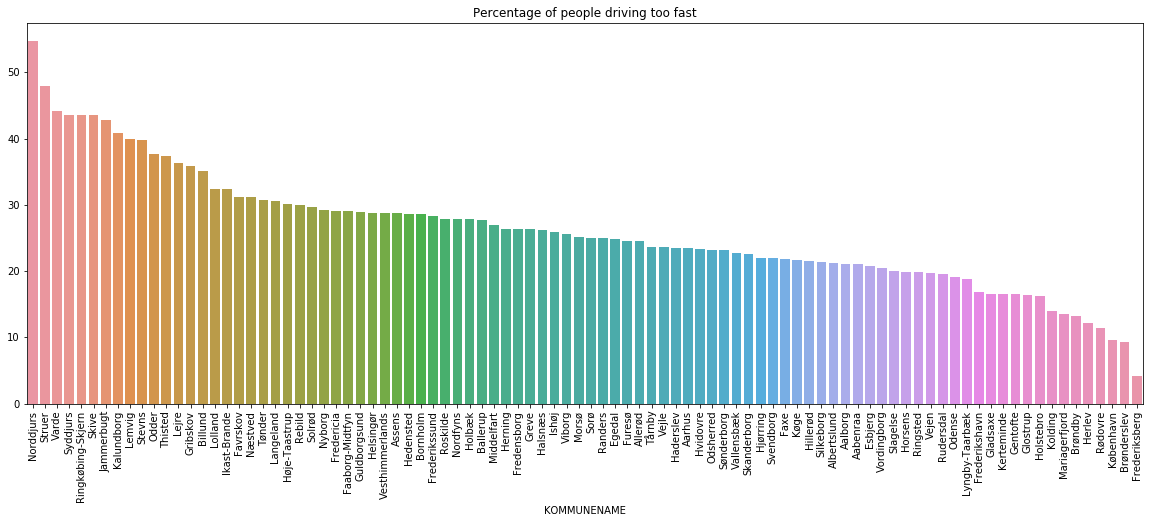

In [86]:
plt.figure(figsize=(20,7))
plt.title("Percentage of people driving too fast")
df = traffic_data.groupby('KOMMUNENAME').PCT_OVER_HASTGR.mean().sort_values(ascending = False)
ax = sns.barplot(df.keys(), df.values, order = df.keys())
plt.setp(ax.get_xticklabels(), rotation=90);

In [ ]:
#Work in progress
for i in traffic_data.KOMMUNE.value_counts().head(10).keys():
    sns.kdeplot(traffic_data[traffic_data.KOMMUNE == i]["AADT"], label= i )

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Distance from the start of the road")
sns.distplot(traffic_data.KILOMETER, kde = False)